# Notebook to better understand datasets

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from torch_geometric_temporal.dataset import METRLADatasetLoader

import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1. METR-LA


### 1.1. Raw data set

In [22]:
from model.dataset import create_train_val_test_split
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=1000, num_timesteps_out=100)

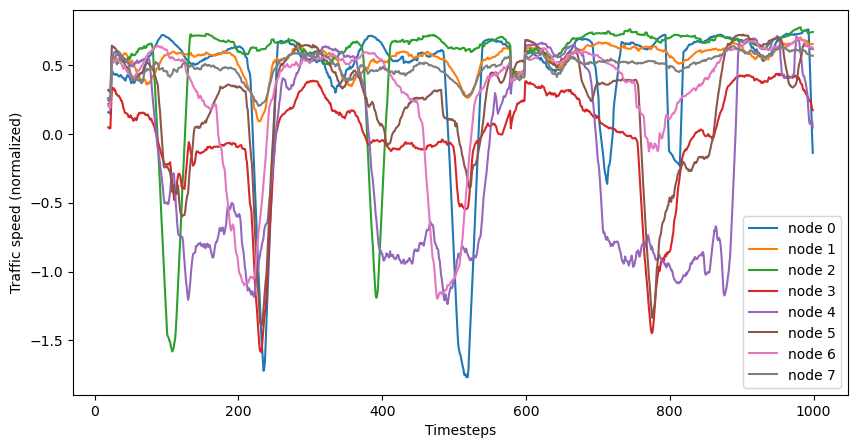

In [30]:
plt.figure(figsize=(10, 5))
for node_idx in range(8):
    plt.plot(pd.Series(dataset_metrola[0].x[node_idx, 0, :].T).rolling(window=20).mean(), label=f'node {node_idx}')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Traffic speed (normalized)')
plt.show()


### 1.2. Same data set as used for current training runs

In [93]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')
from importlib import reload
from model import dataset
reload(dataset)
from model.dataset import create_dataloaders
from omegaconf import OmegaConf

cfg = OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml'))
cfg.train.max_len = 200
train_loader, val_loader, test_loader = create_dataloaders(cfg)

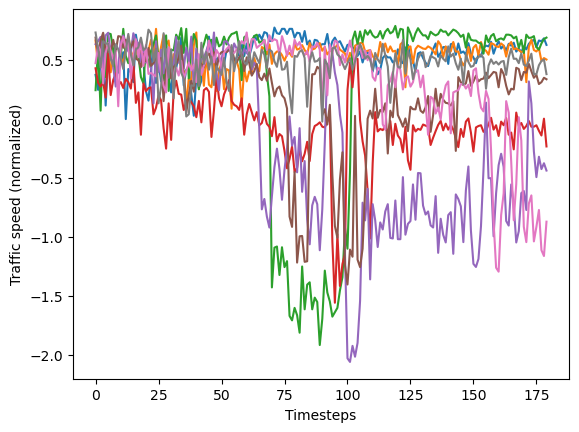

In [94]:
import torch

n_nodes = 8
a = torch.stack([train_loader.dataset[i].y[:n_nodes, 0] for i in range(int(cfg.train.max_len*cfg.train.train_size))])
plt.plot(a)
plt.xlabel('Timesteps')
plt.ylabel('Traffic speed (normalized)')
plt.show()
